In [1]:
import pandas as pd
import os as os
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import matplotlib.style as style

## 01. Generate list of taxa seen in all ASV data

In [35]:
# 18S genera
os.chdir("/Users/nastassiapatin/OneDrive - SCCWRP/Euks_mgns_asvs/18S comparison")
tax_freq_18S = pd.read_csv("18S_frequencies_all_tax_ranks.csv")
genera_18S = list(tax_freq_18S['Genus'].unique())
phyla_genera_18S = tax_freq_18S.groupby(['Phylum','Genus']).size().reset_index().rename(columns={0:'number of occurrences'})

In [36]:
len(genera_18S)

518

In [5]:
tax_freq_18S.head()

,Domain,Phylum,Class,Order,Family,Genus,18S sample,18S reads
0,Eukaryota,Bacillariophyta,Bacillariophyceae,Bacillariales,Bacillariaceae,Pseudo-nitzschia,CN18FESPkoa_SC24,0.139950
1,Eukaryota,Polycystinea,Polycystinea,NaN,NaN,NaN,CN18FESPkoa_SC24,0.162243
2,Eukaryota,Dinophyceae,Dinophyceae,Gymnodiniales,Gymnodiniaceae,Akashiwo,CN18FESPkoa_SC24,0.000058
3,Eukaryota,unknown,unknown,unknown,unknown,unknown,CN18FESPkoa_SC24,0.000879
4,Eukaryota,Bacillariophyta,NaN,NaN,NaN,NaN,CN18FESPkoa_SC24,0.011125


#### Extract arthropod classes and genera

In [6]:
phyla_class_genera_18S = tax_freq_18S.groupby(['Phylum','Class','Genus']).size().reset_index().rename(columns={0:'number of occurrences'})
arthropods = phyla_class_genera_18S[phyla_class_genera_18S['Phylum'] == 'Arthropoda']
arthropods.head()

,Phylum,Class,Genus,number of occurrences
56,Arthropoda,Branchiopoda,Evadne,49
57,Arthropoda,Branchiopoda,g_,63
58,Arthropoda,Hexanauplia,Calocalanus,1127
59,Arthropoda,Hexanauplia,Clausocalanus,1127
60,Arthropoda,Hexanauplia,Eucyclops,49


In [37]:
# COI genera
os.chdir("/Users/nastassiapatin/OneDrive - SCCWRP/Euks_mgns_asvs/COI comparison")
tax_freq_COI = pd.read_csv("COI_frequencies_all_tax_ranks.csv")
genera_COI = list(tax_freq_COI['Genus'].unique())
phyla_genera_COI = tax_freq_COI.groupby(['Phylum','Genus']).size().reset_index().rename(columns={0:'number of occurrences'})

In [38]:
len(genera_COI)

212

#### Extract specific phylum

In [9]:
phyla_class_genera_COI = tax_freq_COI.groupby(['Phylum','Class','Genus']).size().reset_index().rename(columns={0:'number of occurrences'})
phylum = phyla_class_genera_COI[phyla_class_genera_COI['Phylum'] == 'Arthropoda']
phylum.head()

,Phylum,Class,Genus,number of occurrences
27,Arthropoda,Arachnida,g_,991
28,Arthropoda,Branchiopoda,g_,63
29,Arthropoda,Collembola,g_,452
30,Arthropoda,Diplopoda,g_,226
31,Arthropoda,Hexanauplia,Acartia,7953


In [283]:
phylum.to_csv("COI_unique_arthropoda_genera.csv", index=None)

#### Label data sets

In [10]:
phyla_genera_18S['Data set'] = '18S'
phyla_genera_COI['Data set'] = 'COI'

## 2. Get metagenome taxa list

In [2]:
# metagenomes
os.chdir("/Users/nastassiapatin/OneDrive - SCCWRP/Euks_mgns_asvs/DIAMOND")
mgns = pd.read_csv("DIAMOND_euk_lineage_counts.csv")
mgns.head(3)

,Metagenome sample,count,taxid,Kingdom,Phylum,Class,Order,Family,Genus,Species
0,zr2760_79,1,100035,Eukaryota,Ascomycota,Dothideomycetes,Pleosporales,unknown,Massariosphaeria,Massariosphaeria phaeospora
1,zr2760_79,7,1000413,Eukaryota,Streptophyta,Magnoliopsida,Sapindales,Sapindaceae,Acer,Acer yangbiense
2,zr2760_79,1,1000459,Eukaryota,Rhodophyta,Florideophyceae,Halymeniales,Halymeniaceae,Grateloupia,Grateloupia yangjiangensis


#### Generate genus lists with phylum and with both phylum and class

In [8]:
genera_mgns = list(mgns['Genus'].unique())
phyla_genera_mgns = mgns.groupby(['Phylum','Genus']).size().reset_index().rename(columns={0:'number of occurrences'})
phyla_genera_class_mgns = mgns.groupby(['Phylum','Class','Genus']).size().reset_index().rename(columns={0:'number of occurrences'})
phyla_genera_mgns['Data set'] = 'Mgn'

In [9]:
# number of unique genera in the metagenomes
len(genera_mgns)

24814

#### Extract specific phylum

In [29]:
phylum = phyla_genera_class_mgns[phyla_genera_class_mgns['Phylum'] == 'Arthropoda']
phylum.head()

,Phylum,Class,Genus,number of occurrences
341,Arthropoda,Arachnida,Acalitus,2
342,Arthropoda,Arachnida,Acanthinozodium,4
343,Arthropoda,Arachnida,Acanthoscurria,16
344,Arthropoda,Arachnida,Acarapis,19
345,Arthropoda,Arachnida,Acarus,28


In [30]:
clAss = phylum[phylum['Class'] == 'Insecta']
clAss.head()

,Phylum,Class,Genus,number of occurrences
1596,Arthropoda,Insecta,Aaaba,3
1597,Arthropoda,Insecta,Aaages,8
1598,Arthropoda,Insecta,Aaroniella,2
1599,Arthropoda,Insecta,Abachrysa,16
1600,Arthropoda,Insecta,Abacidus,1


In [32]:
clAss.sort_values(by=['number of occurrences'], ascending=False)

,Phylum,Class,Genus,number of occurrences
4021,Arthropoda,Insecta,Drosophila,16167
9751,Arthropoda,Insecta,unknown,16090
2086,Arthropoda,Insecta,Anopheles,4145
9244,Arthropoda,Insecta,Timema,3708
2197,Arthropoda,Insecta,Apis,3316
...,...,...,...,...
5032,Arthropoda,Insecta,Heterosais,1
5037,Arthropoda,Insecta,Heterotermes,1
3519,Arthropoda,Insecta,Crisicoccus,1
3513,Arthropoda,Insecta,Creontiades,1


In [33]:
clAss.shape

(8156, 4)

In [281]:
phylum.to_csv("metagenomes_unique_chordata_genera.csv", index=None)

#### Filter out insects and arthropods

In [15]:
phyla_genera_class_mgns.shape

(25112, 4)

In [16]:
phy_gen_class_filt = phyla_genera_class_mgns[(phyla_genera_class_mgns['Class'] != 'Insecta') & (phyla_genera_class_mgns['Class'] != 'Arachnida')]
phy_gen_class_filt.shape

(16084, 4)

In [17]:
phy_gen_class_filt

,Phylum,Class,Genus,number of occurrences
0,Acantharea,Acantharea,Amphilonche,4
1,Acantharea,Acantharea,Astrolonche,75
2,Acantharea,Acantharea,Phyllostaurus,67
3,Acantharea,Acantharea,Stauracon,133
4,Acantharea,Acantharea,unknown,3
...,...,...,...,...
25107,unknown,unknown,Schizocladia,223
25108,unknown,unknown,Stereomyxa,1
25109,unknown,unknown,Vitrella,488
25110,unknown,unknown,Voromonas,44


In [18]:
phyla_genera_mgns_filt = phy_gen_class_filt.groupby(['Phylum','Genus']).size().reset_index().rename(columns={0:'number of occurrences'})
phyla_genera_mgns_filt.head()

,Phylum,Genus,number of occurrences
0,Acantharea,Amphilonche,1
1,Acantharea,Astrolonche,1
2,Acantharea,Phyllostaurus,1
3,Acantharea,Stauracon,1
4,Acantharea,unknown,1


In [25]:
phylum = phy_gen_class_filt[phy_gen_class_filt['Phylum'] == 'Streptophyta']
phylum.head()

,Phylum,Class,Genus,number of occurrences
20120,Streptophyta,Andreaeobryopsida,Andreaeobryum,14
20121,Streptophyta,Andreaeopsida,Andreaea,476
20122,Streptophyta,Anthocerotopsida,Anthoceros,408
20123,Streptophyta,Anthocerotopsida,Megaceros,11
20124,Streptophyta,Anthocerotopsida,Nothoceros,16


In [27]:
clAss = phylum[phylum['Class'] == 'Magnoliopsida']
clAss.head()

,Phylum,Class,Genus,number of occurrences
20715,Streptophyta,Magnoliopsida,Abatia,11
20716,Streptophyta,Magnoliopsida,Abelia,8
20717,Streptophyta,Magnoliopsida,Abelmoschus,116
20718,Streptophyta,Magnoliopsida,Abolboda,6
20719,Streptophyta,Magnoliopsida,Abrus,242


In [26]:
phylum.shape

(4801, 4)

In [28]:
clAss.shape

(3792, 4)

In [19]:
phy_gen_class_filt.to_csv("metagenomes_phy_class_gen_noInsectaArachnida.csv", index=None)

## 3. Compare genera between ASV data sets

#### Taxa seen in either ASV data set, or in both

In [39]:
phyla_genera_COI.shape

(266, 3)

In [49]:
phyla_genera_18S_COI = pd.merge(phyla_genera_18S, phyla_genera_COI, on=['Phylum', 'Genus'], how='outer', indicator=True)
phyla_genera_18S_COI = phyla_genera_18S_COI.drop(columns={'number of occurrences_x', 'number of occurrences_y'})
phyla_genera_18S_only = phyla_genera_18S_COI[phyla_genera_18S_COI['_merge'] == 'left_only'].drop(columns={'_merge'})
phyla_genera_COI_only = phyla_genera_18S_COI[phyla_genera_18S_COI['_merge'] == 'right_only'].drop(columns={'_merge'})
phyla_genera_18S_COI_both = phyla_genera_18S_COI[phyla_genera_18S_COI['_merge'] == 'both'].drop(columns={'_merge'})
phyla_genera_18S_COI_either = phyla_genera_18S_COI.drop(columns={'_merge'})
phyla_genera_18S_COI_either.head()

,Phylum,Genus
0,Acantharea,Acanthocolla
1,Acantharea,Acanthometra
2,Acantharea,Acanthostaurus
3,Acantharea,Amphibelone
4,Acantharea,Gigartacon


#### Taxa seen in either 18S or COI

In [51]:
phyla_genera_18S_COI_either.shape

(730, 2)

#### Taxa seen across all data sets including metagenomes

In [63]:
phyla_genera_mgns = phy_gen_class_filt.drop(columns={'number of occurrences'})
phyla_genera_mgns['Data set'] = 'Mgn'
df_all = phyla_genera_mgns.merge(phyla_genera_18S_COI_either.drop_duplicates(), on=['Phylum','Genus'], 
                   how='outer', indicator=True).drop(columns={'Data set'})

In [64]:
df_all.tail()

,Phylum,Class,Genus,_merge
16354,Placozoa,NaN,g_,right_only
16355,Porifera,NaN,Pione,right_only
16356,Rotifera,NaN,g_,right_only
16357,Sipuncula,NaN,Phascolosoma,right_only
16358,Xenacoelomorpha,NaN,g_,right_only


#### Taxa seen only in metagenomes

In [65]:
df_mgns_only = df_all[df_all['_merge'] == 'left_only']
df_mgns_only = df_mgns_only.drop(columns={'_merge'})
df_mgns_only['Data set'] = 'Mgn'
df_mgns_only.head()

,Phylum,Class,Genus,Data set
0,Acantharea,Acantharea,Amphilonche,Mgn
1,Acantharea,Acantharea,Astrolonche,Mgn
5,Acanthocephala,Archiacanthocephala,Moniliformis,Mgn
6,Acanthocephala,Palaeacanthocephala,Brentisentis,Mgn
7,Acanthocephala,Palaeacanthocephala,Corynosoma,Mgn


In [70]:
phylum = df_mgns_only[df_mgns_only['Phylum'] == 'Streptophyta']
phylum.head()

,Phylum,Class,Genus,Data set
11092,Streptophyta,Andreaeobryopsida,Andreaeobryum,Mgn
11093,Streptophyta,Andreaeopsida,Andreaea,Mgn
11094,Streptophyta,Anthocerotopsida,Anthoceros,Mgn
11095,Streptophyta,Anthocerotopsida,Megaceros,Mgn
11096,Streptophyta,Anthocerotopsida,Nothoceros,Mgn


In [71]:
phylum.shape

(4792, 4)

In [72]:
clAss = df_mgns_only[df_mgns_only['Class'] == 'Magnoliopsida']
clAss.head()

,Phylum,Class,Genus,Data set
11473,Streptophyta,Magnoliopsida,unknown,Mgn
11695,Streptophyta,Magnoliopsida,Abatia,Mgn
11696,Streptophyta,Magnoliopsida,Abelia,Mgn
11697,Streptophyta,Magnoliopsida,Abelmoschus,Mgn
11698,Streptophyta,Magnoliopsida,Abolboda,Mgn


In [73]:
clAss.shape

(3785, 4)

### Only in 18S, COI, or 18S and COI, but NOT in metagenomes

#### 18S only

In [52]:
# phyla_genera_18S_only already excludes genera seen in COI
df_18S = phyla_genera_mgns.merge(phyla_genera_18S_only.drop_duplicates(), on=['Phylum','Genus'], 
                   how='outer', indicator=True)
df_18S_only = df_18S[df_18S['_merge'] == 'right_only'].drop(columns={'_merge'})
df_18S_only['Data set'] = '18S'
df_18S_only.shape

(189, 4)

#### COI only

In [53]:
df_COI = phyla_genera_mgns.merge(phyla_genera_COI_only.drop_duplicates(), on=['Phylum','Genus'], 
                   how='outer', indicator=True)
df_COI_only = df_COI[df_COI['_merge'] == 'right_only'].drop(columns={'_merge'})
df_COI_only['Data set'] = 'COI'
df_COI_only.shape

(42, 4)

#### ASVs only

In [54]:
df_asvs_only = df_all[df_all['_merge'] == 'right_only'].drop(columns={'_merge'})
df_asvs_only['Data set'] = '18S or COI'
df_asvs_only

,Phylum,Class,Genus,Data set
25112,Acantharea,NaN,Acanthocolla,18S or COI
25113,Acantharea,NaN,Acanthometra,18S or COI
25114,Acantharea,NaN,Acanthostaurus,18S or COI
25115,Acantharea,NaN,Amphibelone,18S or COI
25116,Acantharea,NaN,Gigartacon,18S or COI
...,...,...,...,...
25382,Placozoa,NaN,g_,18S or COI
25383,Porifera,NaN,Pione,18S or COI
25384,Rotifera,NaN,g_,18S or COI
25385,Sipuncula,NaN,Phascolosoma,18S or COI


### 4a. Format data for plotting

In [29]:
def compare_taxa_across_data_sets(dfs):
    phy_gen_mgns = pd.concat(dfs)
    phy_gen_mgns['genus count'] = 1
    phy_gen_mgns = phy_gen_mgns.drop(columns='Genus').groupby(['Phylum', 'Data set']).sum()
    pivot = pd.pivot_table(data=phy_gen_mgns, 
                       index=['Data set'], 
                       columns=['Phylum'], 
                       values='genus count').fillna(0)
    return(phy_gen_mgns, pivot)

#### To compare total numbers across all data sets

In [55]:
dfs = [phyla_genera_mgns, phyla_genera_18S, phyla_genera_COI]

#### To compare genera seen only in certain data sets

In [66]:
dfs = [df_mgns_only, df_18S_only, df_COI_only, df_asvs_only]

### 4b. Make the stacked bar plot

In [67]:
phy_gen_mgns, pivot = compare_taxa_across_data_sets(dfs)

In [68]:
# for the genera exclusive to each data set
pivot = pivot.reindex(['18S', 'COI', '18S or COI', 'Mgn'])

In [69]:
pivot.head()

Phylum,Acantharea,Acanthocephala,Actinophryidae,Annelida,Apicomplexa,Arthropoda,Ascomycota,Aurearenophyceae,Bacillariophyta,Basidiomycota,...,Sipuncula,Streptophyta,Synchromophyceae,Synurophyceae,Tardigrada,Tubulinea,Xanthophyceae,Xenacoelomorpha,Zoopagomycota,unknown
Data set,,,,,,,,,,,,,,,,,,,,,
18S,9.0,0.0,0.0,13.0,2.0,6.0,2.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0
COI,0.0,0.0,0.0,9.0,0.0,7.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
18S or COI,9.0,0.0,0.0,26.0,3.0,14.0,3.0,0.0,2.0,2.0,...,2.0,1.0,0.0,1.0,0.0,2.0,1.0,1.0,1.0,4.0
Mgn,2.0,5.0,2.0,256.0,40.0,10283.0,1355.0,1.0,230.0,551.0,...,0.0,4792.0,1.0,7.0,20.0,24.0,20.0,17.0,53.0,37.0


In [70]:
pivot_sorted = pivot.sort_values(by=pivot.index[3], ascending=False, axis=1) # index[2] for all data sets
pivot_sorted.head()

Phylum,Arthropoda,Streptophyta,Chordata,Ascomycota,Mollusca,Basidiomycota,Cnidaria,Rhodophyta,Chlorophyta,Annelida,...,Olpidiomycota,Bolidophyceae,Orthonectida,Dicyemida,Picozoa,Imbricatea,Sipuncula,Prasinodermophyta,Hemimastigophora,Developea
Data set,,,,,,,,,,,,,,,,,,,,,
18S,6.0,0.0,8.0,2.0,3.0,1.0,11.0,0.0,1.0,13.0,...,0.0,0.0,0.0,0.0,0.0,6.0,1.0,1.0,1.0,2.0
COI,7.0,0.0,4.0,0.0,2.0,0.0,3.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
18S or COI,14.0,1.0,13.0,3.0,6.0,2.0,15.0,1.0,2.0,26.0,...,0.0,1.0,0.0,0.0,1.0,7.0,2.0,1.0,1.0,2.0
Mgn,10283.0,4792.0,2762.0,1355.0,836.0,551.0,485.0,459.0,352.0,256.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


#### With an axis break

[Text(0, 0, '18S'),
 Text(1, 0, 'COI'),
 Text(2, 0, '18S or COI'),
 Text(3, 0, 'Metagenomes')]

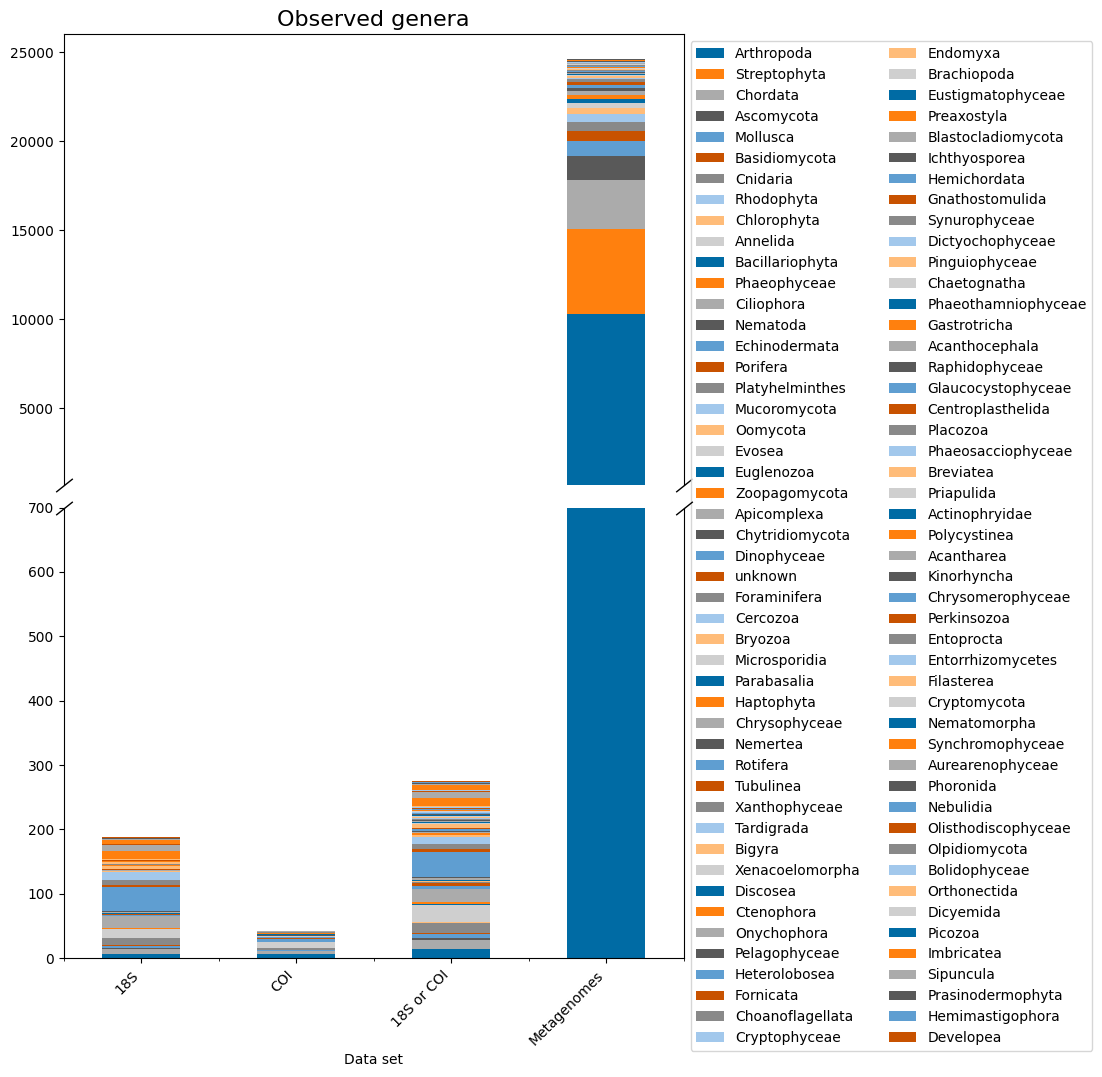

In [73]:
style.use('tableau-colorblind10')

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8,12))
fig.subplots_adjust(hspace=0.05)  # adjust space between axes

# plot the same data on both axes
pivot_sorted.plot(ax=ax1, kind='bar', stacked=True)
pivot_sorted.plot(ax=ax2, kind='bar', stacked=True, legend=False)

# zoom-in / limit the view to different portions of the data
ax1.set_ylim(700, 26000)  # mgns
ax2.set_ylim(0, 700)  # asvs

# Hide the borders and generate break marks
ax1.spines["bottom"].set_visible(False)
ax2.spines["top"].set_visible(False)
ax1.tick_params(axis="x", which="both", length=0)
#ax1.tick_params(labelbottom="off")
ax2.tick_params(labeltop="off")
ax2.xaxis.tick_bottom()

d = 0.8  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

# This labels the bottom (largest) section of the metagenome bar
#ax1.bar_label(ax1.containers[0], fmt=lambda x: x if x > 0 else '', label_type='edge')

ax1.legend(bbox_to_anchor=(1, 1),
          ncol=2, fancybox=True)
ax1.set_title('Observed genera', fontsize=16)
ax2.set_xticklabels(['18S', 'COI', '18S or COI', 'Metagenomes'], ha='right', rotation=45) #  

In [74]:
fig.savefig('Genera_exclusive_to_each_dataset.png', bbox_inches='tight')

In [68]:
pivot

Phylum,Acantharea,Acanthocephala,Annelida,Aphelidea,Apicomplexa,Arthropoda,Ascomycota,Bacillariophyta,Basidiomycota,Bigyra,...,Rotifera,Sipuncula,Streptophyta,Synurophyceae,Tardigrada,Tubulinea,Xanthophyceae,Xenacoelomorpha,Zoopagomycota,unknown
Data set,,,,,,,,,,,,,,,,,,,,,
18S,12.0,0.0,12.0,1.0,2.0,6.0,1.0,2.0,0.0,11.0,...,0.0,0.0,1.0,2.0,0.0,1.0,1.0,0.0,0.0,3.0
18S or COI,12.0,0.0,23.0,1.0,3.0,11.0,2.0,3.0,1.0,13.0,...,2.0,0.0,2.0,3.0,0.0,2.0,1.0,1.0,1.0,4.0
COI,0.0,0.0,7.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Mgn,0.0,12.0,303.0,0.0,42.0,12315.0,1908.0,228.0,715.0,0.0,...,31.0,12.0,4885.0,0.0,20.0,23.0,0.0,27.0,54.0,560.0
